# Goal of the exercise is to cleanup & explore data from the Craigslists auto sales classifields. 


WIP...

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
sns.set_style("whitegrid")

In [115]:
#Load in the data & create Pandas dataframe
cz_df = pd.read_csv('craigslist-carstrucks-data-v2/craigslistVehiclesFull.csv')

In [116]:
cz_df.head()

url      city  price    year  \
0  https://marshall.craigslist.org/cto/d/2010-dod...  marshall  11900  2010.0   
1  https://marshall.craigslist.org/cto/d/fleetwoo...  marshall   1515  1999.0   
2  https://marshall.craigslist.org/cto/d/2008-for...  marshall  17550  2008.0   
3  https://marshall.craigslist.org/cto/d/ford-tau...  marshall   2800  2004.0   
4  https://marshall.craigslist.org/cto/d/2001-gra...  marshall    400  2001.0   

  manufacturer             make condition    cylinders fuel  odometer  ...  \
0        dodge    challenger se      good  6 cylinders  gas   43600.0  ...   
1          NaN        fleetwood       NaN          NaN  gas       NaN  ...   
2         ford            f-150       NaN          NaN  gas       NaN  ...   
3         ford           taurus      good  6 cylinders  gas  168591.0  ...   
4          NaN  2001 Grand Prix       NaN          NaN  gas  217000.0  ...   

  paint_color                                          image_url      lat  \
0         red  https://images.craigslist.org/00i0i_2ggH1eKDNK...  43.4775   
1         NaN  https://images.craigslist.org/00M0M_irjh7SjEcU...  44.7612   
2         NaN  https://images.craigslist.org/00s0s_eL2XFhEUcx...  44.1415   
3        grey  https://images.craigslist.org/00L0L_5HUR1nQjt8...  43.2845   
4         NaN  https://images.craigslist.org/00n0n_bJJ1XnonSG...  43.0261   

       long county_fips county_name state_fips state_code    state_name  \
0  -96.7041     46083.0     Lincoln       46.0         SD  South Dakota   
1  -96.6907     46039.0       Deuel       46.0         SD  South Dakota   
2 -103.2052     46093.0       Meade       46.0         SD  South Dakota   
3  -95.5930     19143.0     Osceola       19.0         IA          Iowa   
4  -94.4064     19109.0     Kossuth       19.0         IA          Iowa   

   weather  
0     38.0  
1     38.0  
2     38.0  
3     47.0  
4     47.0  

[5 rows x 26 columns]

# The raw dataset contains many statistical outliers in regards to highly unregulated craigslist postings. Price, year & odometer minimums & maximums are likely user error or misinformation. 

In [117]:
cz_df.describe()

price          year      odometer           lat          long  \
count  1.723065e+06  1.716750e+06  1.159011e+06  1.723065e+06  1.723065e+06   
mean   1.075540e+05  2.004841e+03  1.136387e+05  3.878195e+01 -9.371198e+01   
std    1.004439e+07  1.208772e+01  1.368603e+05  5.976412e+00  1.696519e+01   
min    1.000000e+00  3.020000e+02  0.000000e+00 -8.481005e+01 -1.000000e+03   
25%    3.295000e+03  2.002000e+03  5.800000e+04  3.491900e+01 -1.058010e+02   
50%    7.000000e+03  2.007000e+03  1.070000e+05  3.940989e+01 -8.824070e+01   
75%    1.499900e+04  2.012000e+03  1.520000e+05  4.255459e+01 -8.102650e+01   
max    2.068627e+09  2.019000e+03  1.000000e+07  9.000000e+01  1.397061e+02   

        county_fips    state_fips       weather  
count  1.664232e+06  1.664232e+06  1.663637e+06  
mean   2.843053e+04  2.834410e+01  5.378706e+01  
std    1.605423e+04  1.603224e+01  7.799381e+00  
min    1.001000e+03  1.000000e+00  2.900000e+01  
25%    1.212300e+04  1.200000e+01  4.800000e+01  
50%    2.902100e+04  2.900000e+01  5.300000e+01  
75%    4.106700e+04  4.100000e+01  5.900000e+01  
max    5.604500e+04  5.600000e+01  7.900000e+01

# 1.7 million rows of data, 26 columns

In [118]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


# Lets take a look at where these post are coming from using lat & long from a sample of 10,000 shuffled rows

In [119]:
df_shuffled = cz_df.sample(frac=1)
df_shuffled.head()
plt.figure(figsize=(12,6))
m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -170,
            urcrnrlat = 80,
            urcrnrlon = -60,
            resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
i = 0
for index, row in df_shuffled.iterrows():
    lat = row['lat']
    lon = row['long']
    xpt, ypt = m(lon, lat)
    m.plot(xpt,ypt,'.',markersize=0.2,c="red")
    # stopping criteria
    i = i + 1
    if (i == 10000): break

## It's time to perform data cleansing 

Drop fields that will not be used for analysis

In [120]:
cz_df.drop(columns=['url','fuel', 'vin','size','image_url','lat','long','county_fips','county_name','state_fips','state_code','state_name','weather'],inplace = True)

Craigslist has many duplicate listings from buyers/bots attempting to sell vehicles...postings may be duplicated across cities, so the 'city' field is excluded in fields considered for duplicate row removal

In [121]:
cz_df.drop_duplicates(subset= cz_df.columns.difference(['city']),keep = 'last', inplace = True)

In [122]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295627 entries, 1 to 1723064
Data columns (total 13 columns):
city            1295627 non-null object
price           1295627 non-null int64
year            1290077 non-null float64
manufacturer    1184478 non-null object
make            1241194 non-null object
condition       816598 non-null object
cylinders       808206 non-null object
odometer        855050 non-null float64
title_status    1293788 non-null object
transmission    1290449 non-null object
drive           807320 non-null object
type            762614 non-null object
paint_color     790481 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 138.4+ MB


## Would only like to include vehicles with manufacturer, make, price, year, title status, condition & odometer readings

In [123]:
cz_df.dropna(subset = ['title_status','odometer','condition', 'manufacturer','make','price','year'],inplace= True)

In [124]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558389 entries, 9 to 1723064
Data columns (total 13 columns):
city            558389 non-null object
price           558389 non-null int64
year            558389 non-null float64
manufacturer    558389 non-null object
make            558389 non-null object
condition       558389 non-null object
cylinders       490115 non-null object
odometer        558389 non-null float64
title_status    558389 non-null object
transmission    558266 non-null object
drive           468839 non-null object
type            451241 non-null object
paint_color     458021 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 59.6+ MB


Force relevant string fields to lowercase to enable consistent, searchable format

In [125]:
cz_df['manufacturer'] = cz_df['manufacturer'].str.lower()

In [126]:
cz_df['make'] = cz_df['make'].str.lower()

## Outliers in price, year, & mileage will be removed. Sellers may accidently add an extra 0 to the price, or list the selling price as $0 (Free Car?!)

In [127]:
cz_df.price.quantile(q = 0.999)

95000.0

##  Only include cars newer than 1979, with a price greater than $500 but less than $95,000 & with miles greater than 0 but less than 300,000


In [128]:
cz_df = cz_df[(cz_df['year'] > 1979) & (cz_df['year'] < 2020) & (cz_df['price'] < cz_df['price'].quantile(.999)) & (cz_df['price'] > 500) & (cz_df['odometer']>0)&(cz_df['odometer']<300000)]

In [129]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529083 entries, 9 to 1723064
Data columns (total 13 columns):
city            529083 non-null object
price           529083 non-null int64
year            529083 non-null float64
manufacturer    529083 non-null object
make            529083 non-null object
condition       529083 non-null object
cylinders       464450 non-null object
odometer        529083 non-null float64
title_status    529083 non-null object
transmission    528963 non-null object
drive           444092 non-null object
type            427486 non-null object
paint_color     433444 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 56.5+ MB


In [130]:
cz_df.describe()

price           year       odometer
count  529083.000000  529083.000000  529083.000000
mean    10029.764528    2006.841067  117769.489613
std      9426.839425       6.590456   63221.628401
min       502.000000    1980.000000       1.000000
25%      3500.000000    2003.000000   71968.000000
50%      6950.000000    2007.000000  119000.000000
75%     13500.000000    2012.000000  160985.500000
max     94994.000000    2019.000000  299999.000000

## Boxplot focusing on price distribution. We can see the quartiles within the plot matching the 25% , 50%, 75% quartiles as described above

In [131]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=cz_df);

A quick look at the histogram distribution for year

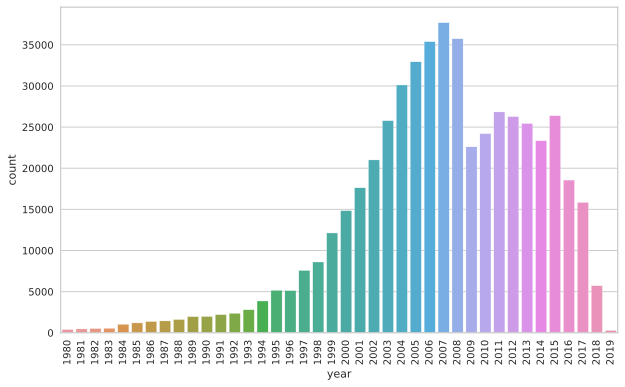

In [132]:
cz_df['year'] = cz_df['year'].astype(int)
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'year',data=cz_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=10);

Checking out the distribution for 'odometer' miles

Text(0.5, 1.0, 'Vehicle Miles')

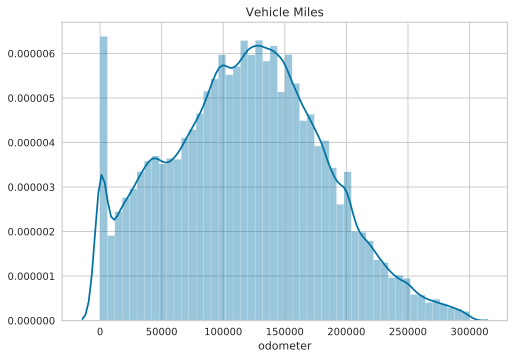

In [133]:
sns.distplot(cz_df['odometer'])
plt.title('Vehicle Miles')

Top 10 Manufacturer counts

In [134]:
top_10 =cz_df['manufacturer'].value_counts().iloc[:10]

In [135]:
top_10

ford         90853
chevrolet    64794
toyota       43125
honda        33242
nissan       28249
jeep         25475
dodge        24606
gmc          20728
bmw          16606
ram          15266
Name: manufacturer, dtype: int64

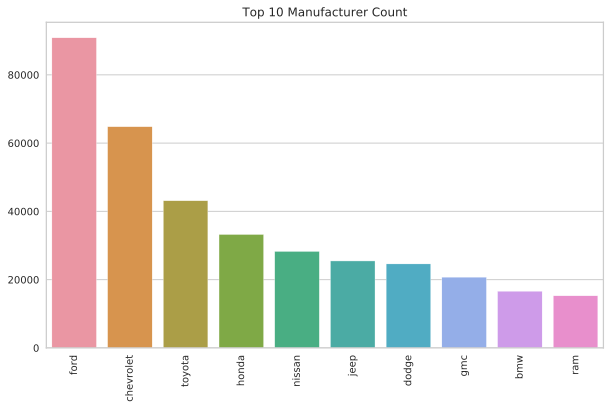

In [136]:
plt.figure(figsize=(10,6))
ax = sns.barplot(top_10.index,top_10.values);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=10);
plt.title("Top 10 Manufacturer Count");

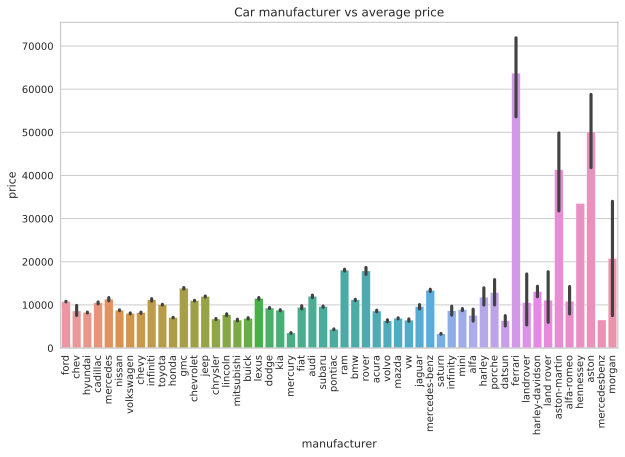

In [137]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=cz_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=10);
plt.title("Car manufacturer vs average price");

Take a quick look at the count of vehicles by transmission...Not surprisingly, automatic transmissions dominate the market (Save the Manuals!)

Text(0.5, 1.0, 'Count by Transmission')

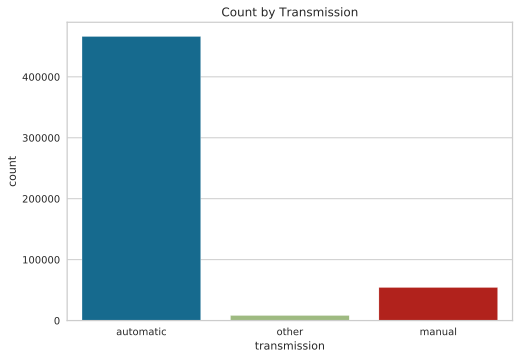

In [138]:
ax = sns.countplot(x='transmission', data=cz_df)
plt.title('Count by Transmission')

## The BMW M3 is my personal favorite series...so lets dive in and take a look at whats available from the Craigslist dataset

In [139]:
bmw_m3 = cz_df[(cz_df['manufacturer'] == 'bmw') & (cz_df['make'] == 'm3')]

In [140]:
bmw_m3.head()

city  price  year manufacturer make  condition    cylinders  \
8851       memphis  16000  2011          bmw   m3  excellent  8 cylinders   
13170       albany  29000  2006          bmw   m3  excellent  6 cylinders   
42881      mankato  12500  2003          bmw   m3  excellent          NaN   
47744  jerseyshore  15000  2002          bmw   m3       good  6 cylinders   
48052    southbend  26000  2010          bmw   m3  excellent  8 cylinders   

       odometer title_status transmission drive         type paint_color  
8851    65000.0      missing       manual   rwd  convertible       black  
13170   97451.0        clean       manual   rwd        coupe       black  
42881  102600.0        clean    automatic   rwd  convertible      silver  
47744   75000.0        clean       manual   rwd  convertible        blue  
48052   61000.0        clean    automatic   rwd  convertible       black

In [141]:
bmw_m3.describe()

price         year       odometer
count    315.000000   315.000000     315.000000
mean   20092.634921  2004.698413   97086.098413
std    14240.601886     6.041351   56116.913550
min     2000.000000  1988.000000      81.000000
25%     9880.500000  1999.000000   55337.000000
50%    15000.000000  2004.000000   93700.000000
75%    27499.000000  2009.000000  134954.000000
max    79500.000000  2018.000000  266000.000000

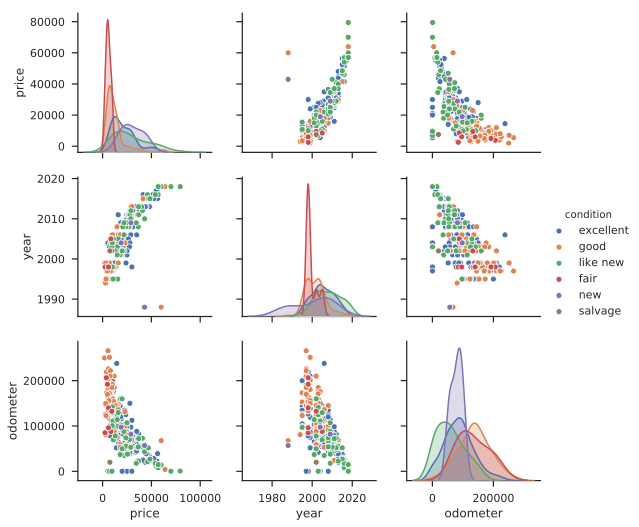

In [142]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(bmw_m3, hue="condition");

Looks like there are owner described "new" & "like new" E30 M3's for sale...For all M3's listed, the median year is 2004 @ 92.9K miles, for $15K. We know classic M3's such as the E30 have appreciated in value over the past few years; thus, if we refer to the price v. year plot, we can see that the price is relatively low once we have entered the E36 territory. How much longer until examples of tracked/abused/high mileage E36's fade out, leaving clean, appreciating high value E36's on the market? (This would require the postings' timestamp over a collection of many years of data)

## Linear Regression via numerical values for BMW M3

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
import warnings
from sys import modules

In [144]:
bmw_m3_learn = bmw_m3[['odometer','year','price']]

ensure removal of rows with NaN

In [145]:
bmw_m3_learn = bmw_m3_learn.dropna()
bmw_m3_learn.shape

(315, 3)

In [146]:
bmw_m3_train, bmw_m3_test = split(bmw_m3_learn, train_size = .4 , random_state = 100)

In [147]:
X_train = bmw_m3_train[['odometer','year']]
y_train = bmw_m3_train['price']
X_test = bmw_m3_test[['odometer','year']]
y_test = bmw_m3_test['price']

In [148]:
bmw_m3_lr = LinearRegression(fit_intercept=True)

In [149]:
bmw_m3_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [150]:
print("Intercept: {}".format(bmw_m3_lr.intercept_))
print("Coefficients: {}".format(bmw_m3_lr.coef_[0]))

Intercept: -3263161.3215111685
Coefficients: -0.0378734189991636


In [151]:
X_train['Price_prediction'] = bmw_m3_lr.predict(X_train)
X_train.head()

odometer  year  Price_prediction
728720    86000.0  2005      20398.970040
713492    51827.0  2015      38086.322655
768431    29800.0  2015      38920.560455
1722770   72207.0  2011      30757.220669
710655    55915.0  2006      23177.702278

In [152]:
bmw_m3_train_rmse = np.sqrt(MSE(y_train, X_train['Price_prediction']))
print("RMSE = {:.2f}".format(bmw_m3_train_rmse))

RMSE = 6595.63


In [153]:
bmw_m3_lr_test = LinearRegression()

In [154]:
bmw_m3_lr_test.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
X_test['price_prediction'] = bmw_m3_lr_test.predict(X_test)
X_test.head()

odometer  year  price_prediction
788296      625.0  2018      46995.618530
1464245   60000.0  2011      32320.893743
570393    85500.0  2008      26027.056385
13170     97451.0  2006      22271.264551
1146622  112000.0  2005      19646.053303

In [156]:
print("Intercept: {}".format(bmw_m3_lr_test.intercept_))
print("Coefficients: {}".format(bmw_m3_lr_test.coef_[0]))

Intercept: -2691450.8438239247
Coefficients: -0.0871657235094166


In [157]:
bmw_m3_lr_test_rmse = np.sqrt(MSE(y_test, X_test['price_prediction']))
print("RMSE = {:.2f}".format(bmw_m3_lr_test_rmse))

RMSE = 8885.02


## Prediction Error Lasso Model

In [158]:
X, y = load_concrete()
model= Lasso()
visualizer = PredictionError(model)

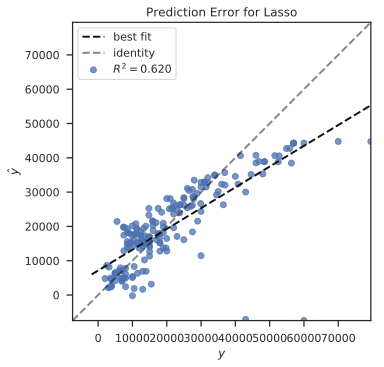

In [159]:
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()